
... ***CURRENTLY UNDER DEVELOPMENT*** ...


## Obtain wave families
### In this case, two swell systems, one local sea

inputs required: 
  * Historical wave conditions (GOW2 hindcast)
  * Wave families sectors; the split is based on wave direction
  
in this notebook:
  * Split energy based on defined sectors
  * Remove TC associated waves to avoid double counting 


### Workflow:

<div>
<img src="attachment:nb09.png" width="300px">
</div>


In [1]:
#!/usr/bin/env python
# -*- coding: utf-8 -*-

# common
import os
import os.path as op
from datetime import datetime

# for user inputs
import tkinter as tk
from tkinter import filedialog
from tkinter import simpledialog

# pip
import numpy as np
import xarray as xr

# for input configuration
import sys
sys.path.append('../../..')  # Appending parent directory to Python path
from input_configuration import *

# DEV: override installed teslakit
import sys
sys.path.insert(0, op.join(os.path.abspath(''), '..', '..', '..'))

# teslakit
from teslakit.database import Database
from teslakit.waves import GetDistribution
from teslakit.plotting.waves import Plot_Waves_QAQC_ts, Plot_Waves_QAQC_pdf



## Database and Site parameters

In [2]:
# Teslakit database

p_data = p_data_input
db = Database(p_data)

# make a new site
db.MakeNewSite(site_name)

Teslakit Site already exists at C:/Users/fergusonpc/OneDrive - CDM Smith/Trinnex/CSDP/Teslakit-SF/Teslakit-SF-OG/Teslakit-SF\sites\SF


In [3]:
# --------------------------------------
# load data and set parameters

WVS_pts = db.Load_WAVES_partitions()  # waves partitions data
WVS_pts.hs[0]=0; # maybe no need this line
print(WVS_pts)
print(WVS_pts.hs[0])

# wave families sectors
fams_sectors = [(135, 240), (240,10)] # 3rd swell for HI (140,240)] #ROI [(210, 22.5), (22.5, 135),]


<xarray.Dataset>
Dimensions:    (time: 350640)
Coordinates:
  * time       (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    longitude  (time) float64 ...
    latitude   (time) float64 ...
    MAPSTA     (time) int64 ...
    hs         (time) float64 ...
    dir        (time) float64 ...
    hs0        (time) float64 ...
    hs1        (time) float64 ...
    hs2        (time) float64 ...
    hs3        (time) float64 ...
    tp0        (time) float64 ...
    tp1        (time) float64 ...
    tp2        (time) float64 ...
    tp3        (time) float64 ...
    th0        (time) float64 ...
    th1        (time) float64 ...
    th2        (time) float64 ...
    th3        (time) float64 ...
    tp         (time) float64 ...
<xarray.DataArray 'hs' ()>
array(0.)
Coordinates:
    time     datetime64[ns] 1979-01-01



## Calculate Historical Waves Families

In [4]:
# --------------------------------------
# Calculate wave families from waves partitions data and waves sectors

WVS = GetDistribution(WVS_pts, fams_sectors)

print(WVS)


<xarray.Dataset>
Dimensions:      (time: 350640)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    Hs           (time) float64 0.0 0.1706 0.2707 0.2898 ... 2.165 2.11 2.059
    Tp           (time) float64 nan 2.56 2.546 2.613 ... 13.07 13.05 13.04 13.05
    Dir          (time) float64 nan 321.3 321.8 321.3 ... 289.8 290.1 290.6
    sea_Hs       (time) float64 nan 0.212 0.332 0.366 ... 2.702 2.574 2.516 2.47
    sea_Tp       (time) float64 nan 1.93 2.55 2.77 2.96 ... 9.33 9.34 9.37 9.41
    sea_Dir      (time) float64 nan 323.0 327.0 330.0 ... 318.0 318.0 319.0
    swell_1_Hs   (time) float64 nan nan nan nan ... 0.2154 0.2135 0.2115 0.2096
    swell_1_Tp   (time) float64 nan nan nan nan nan ... 17.49 17.47 17.46 17.44
    swell_1_Dir  (time) float64 nan nan nan nan nan ... 191.2 191.2 190.3 189.4
    swell_2_Hs   (time) float64 nan nan nan nan nan ... 1.086 1.258 1.256 1.244
    swell_2_Tp   (time) float64 nan nan nan nan nan ... 


## TCs: Waves  Selection - bypass TCs

In [5]:
# --------------------------------------
# add TCs category alongside WAVES data

WVS['TC_category'] = (('time',), np.empty(len(WVS.time))*np.nan) # fill with nan's since bypassing

print(WVS)
    
# Store historical WAVES data
db.Save_WAVES_hist(WVS)


<xarray.Dataset>
Dimensions:      (time: 350640)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    Hs           (time) float64 0.0 0.1706 0.2707 0.2898 ... 2.165 2.11 2.059
    Tp           (time) float64 nan 2.56 2.546 2.613 ... 13.07 13.05 13.04 13.05
    Dir          (time) float64 nan 321.3 321.8 321.3 ... 289.8 290.1 290.6
    sea_Hs       (time) float64 nan 0.212 0.332 0.366 ... 2.702 2.574 2.516 2.47
    sea_Tp       (time) float64 nan 1.93 2.55 2.77 2.96 ... 9.33 9.34 9.37 9.41
    sea_Dir      (time) float64 nan 323.0 327.0 330.0 ... 318.0 318.0 319.0
    swell_1_Hs   (time) float64 nan nan nan nan ... 0.2154 0.2135 0.2115 0.2096
    swell_1_Tp   (time) float64 nan nan nan nan nan ... 17.49 17.47 17.46 17.44
    swell_1_Dir  (time) float64 nan nan nan nan nan ... 191.2 191.2 190.3 189.4
    swell_2_Hs   (time) float64 nan nan nan nan nan ... 1.086 1.258 1.256 1.244
    swell_2_Tp   (time) float64 nan nan nan nan nan ... 

## QAQC Wave Families

In [6]:
# load in data
WVS = db.Load_WAVES_hist()
print(WVS)

# calc range of wave steepness
ws = WVS.Hs/((9.82/(2*np.pi))*WVS.Tp**2)


<xarray.Dataset>
Dimensions:      (time: 350640)
Coordinates:
  * time         (time) datetime64[ns] 1979-01-01 ... 2018-12-31T23:00:00
Data variables:
    Hs           (time) float64 ...
    Tp           (time) float64 ...
    Dir          (time) float64 ...
    sea_Hs       (time) float64 ...
    sea_Tp       (time) float64 ...
    sea_Dir      (time) float64 ...
    swell_1_Hs   (time) float64 ...
    swell_1_Tp   (time) float64 ...
    swell_1_Dir  (time) float64 ...
    swell_2_Hs   (time) float64 ...
    swell_2_Tp   (time) float64 ...
    swell_2_Dir  (time) float64 ...
    TC_category  (time) float64 ...
Attributes:
    source:   teslakit_v0.9.1


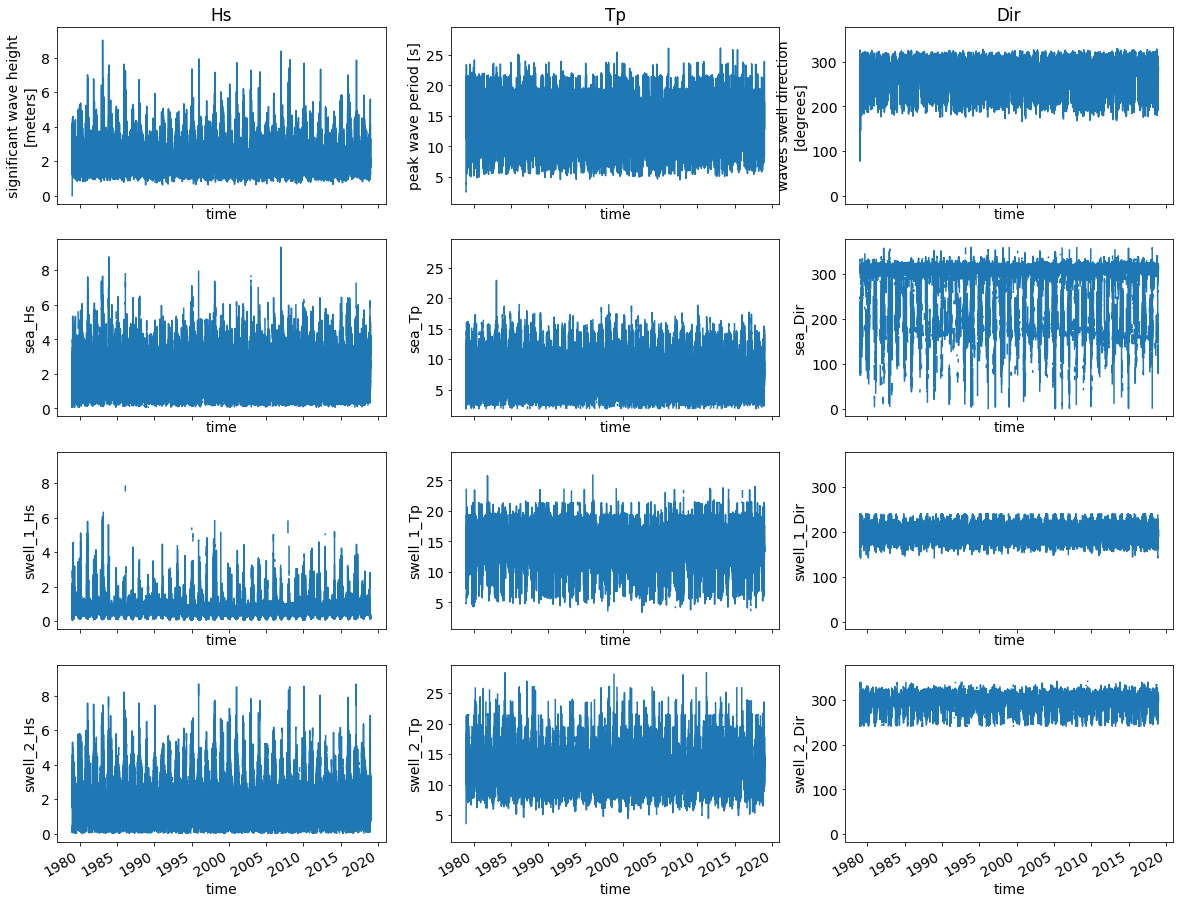

In [7]:
# --------------------------------------
# Plot timeseries of wave families

Plot_Waves_QAQC_ts(WVS);

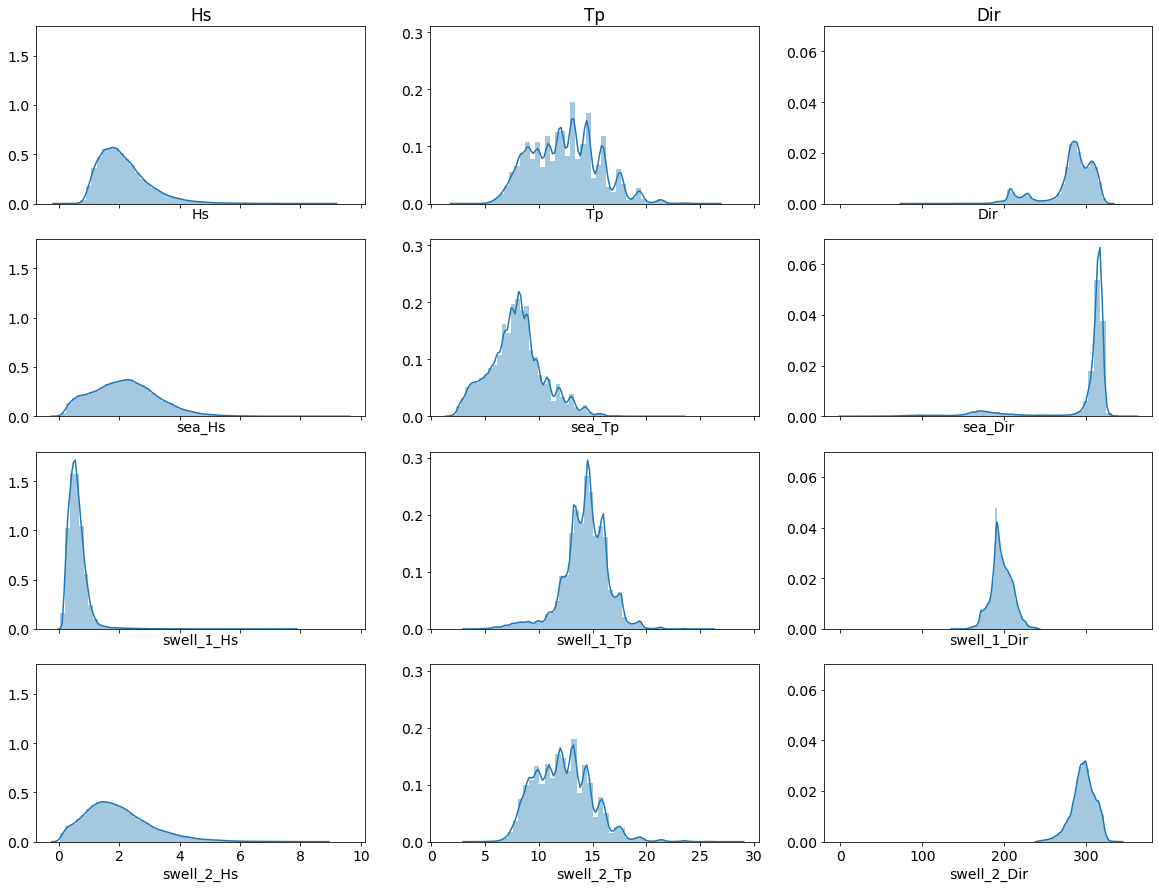

In [8]:
# --------------------------------------
# Plot pdfs of wave families

Plot_Waves_QAQC_pdf(WVS);

### scatter plots of wave families

In [9]:

def scatter_hist(x, y, col, ax, ax_histx, ax_histy, title):
    # no labels
    ax_histx.tick_params(axis="x", labelbottom=False)
    ax_histy.tick_params(axis="y", labelleft=False)

    # the scatter plot:
    plt1 = ax.scatter(x, y, c=col,vmin=0,vmax=360)

    # now determine nice limits by hand:
    binwidth = 0.25
    xymax = max(np.max(np.abs(x)), np.max(np.abs(y)))
    limx = [np.nanmin(x), np.nanmax(x)]
    limy = [np.nanmin(y), np.nanmax(y)]
    bins_x = np.arange(limx[0], limx[1] + binwidth, binwidth)
    bins_y = np.arange(limy[0], limy[1] + binwidth, binwidth)
    ax_histx.hist(x, bins=bins_x)
    ax_histy.hist(y, bins=bins_y, orientation='horizontal')
    ax.set_ylabel('Tp')
    ax.set_xlabel('Hs')
    cbar = fig.colorbar(plt1, ax=ax_histy)
    cbar.set_label('Dir')
    fig.suptitle(title)

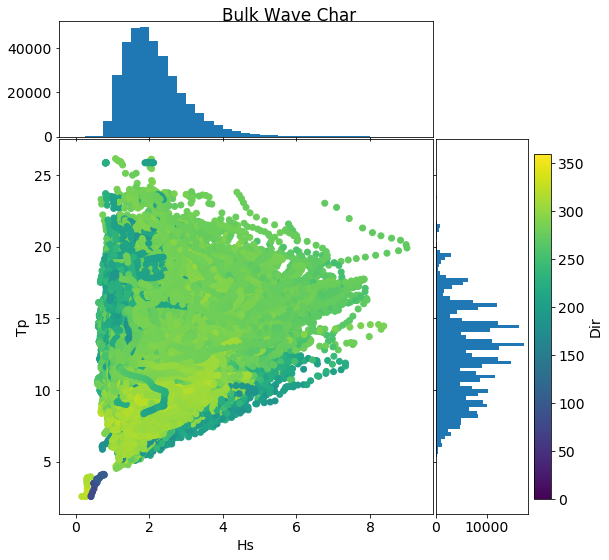

In [10]:
import matplotlib.pyplot as plt


# definitions for the axes
left, width = 0.1, 0.65
bottom, height = 0.1, 0.65
spacing = 0.005


rect_scatter = [left, bottom, width, height]
rect_histx = [left, bottom + height + spacing, width, 0.2]
rect_histy = [left + width + spacing, bottom, 0.2, height]

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function
scatter_hist(WVS.Hs, WVS.Tp, WVS.Dir, ax, ax_histx, ax_histy,'Bulk Wave Char')



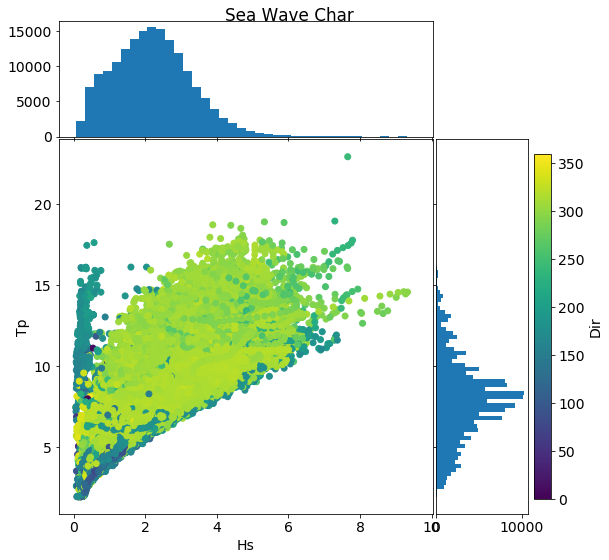

In [11]:

# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function

scatter_hist(WVS.sea_Hs, WVS.sea_Tp, WVS.sea_Dir, ax, ax_histx, ax_histy,'Sea Wave Char')


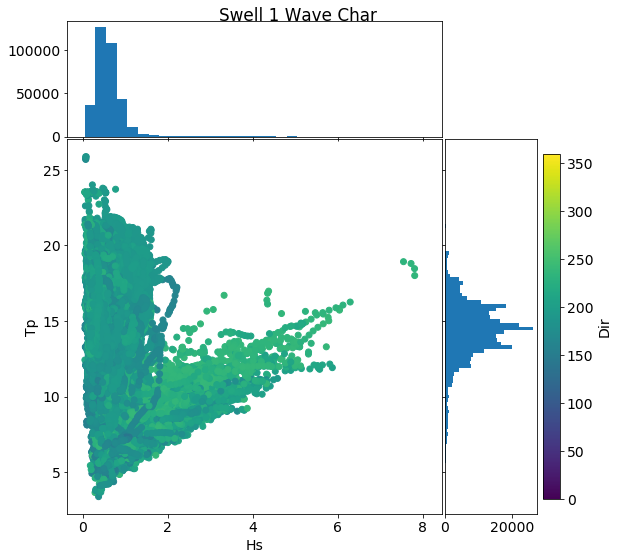

In [12]:
# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function

scatter_hist(WVS.swell_1_Hs, WVS.swell_1_Tp, WVS.swell_1_Dir, ax, ax_histx, ax_histy,'Swell 1 Wave Char')


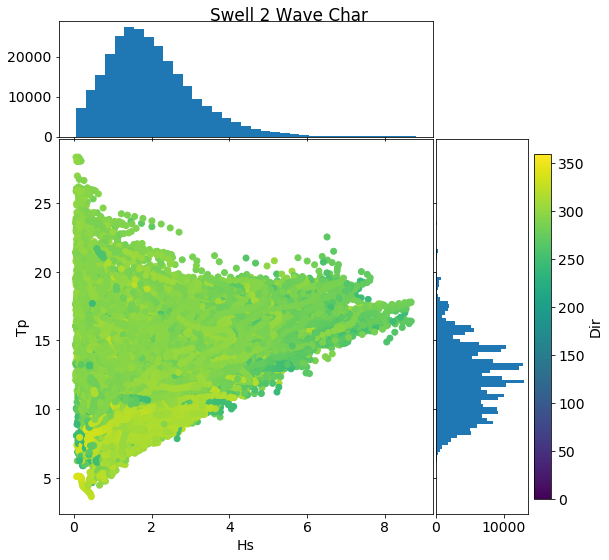

In [13]:
# start with a square Figure
fig = plt.figure(figsize=(8, 8))

ax = fig.add_axes(rect_scatter)
ax_histx = fig.add_axes(rect_histx, sharex=ax)
ax_histy = fig.add_axes(rect_histy, sharey=ax)

# use the previously defined function

scatter_hist(WVS.swell_2_Hs, WVS.swell_2_Tp, WVS.swell_2_Dir, ax, ax_histx, ax_histy,'Swell 2 Wave Char')


In [14]:
WVS['time'][(np.isnan(WVS['Hs']))]

<xarray.DataArray 'time' (time: 0)>
array([], dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns]

In [15]:
WVS_pts.close()